In [42]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import api_import 
import simplejson as json

In [112]:
#Load master dataframe
df = pd.read_json("../data/census_zillow_subway_yelp_data.json")
df.set_index(['COUNTY_ID', 'TRACT_ID'],inplace=True,drop=True)
df.columns

Index([u'ALAND', u'ALAND_SQMI', u'AWATER', u'AWATER_SQMI', u'BOROUGH', u'FRAC_LAND', u'GEOID', u'INTPTLAT', u'INTPTLONG', u'LATMAX', u'LATMIN', u'LONGMAX', u'LONGMIN', u'STATE', u'STATE_ID', u'STATION', u'STATION_DISTANCE', u'USPS', u'ZIPCODE', u'average_rating_restaurants_chinese', u'average_rating_restaurants_cuban', u'average_rating_restaurants_greek', u'average_rating_restaurants_indpak', u'average_rating_restaurants_italian', u'average_rating_restaurants_japanese', u'average_rating_restaurants_latin', u'average_rating_restaurants_mexican', u'average_rating_restaurants_newamerican', u'average_rating_restaurants_puertorican', u'average_rating_restaurants_tradamerican', u'average_rating_restaurants_vegetarian', u'closed_number_restaurants_chinese', u'closed_number_restaurants_cuban', u'closed_number_restaurants_greek', u'closed_number_restaurants_indpak', u'closed_number_restaurants_italian', u'closed_number_restaurants_japanese', u'closed_number_restaurants_latin', u'closed_number_r

In [291]:
#Add additional test features
df['fraction_asian'] = (df['pop_asian'] / df['pop_total'])
df['fraction_latino'] = (df['pop_latino'] / df['pop_total'])
df['fraction_white'] = (df['pop_white'] / df['pop_total'])
df['fraction_black'] = (df['pop_black'] / df['pop_total'])
df['pop_density'] = df['transient_residential_pop'] / df['ALAND']

In [292]:
#Check that all features are available
df.head(3)

ALAND  ALAND_SQMI   AWATER  AWATER_SQMI BOROUGH  \
COUNTY_ID TRACT_ID                                                      
5         100       1672467       0.646  1032658        0.399   Bronx   
          200        455322       0.176   926899        0.358   Bronx   
          2702       157365       0.061        0        0.000   Bronx   

                    FRAC_LAND        GEOID   INTPTLAT  INTPTLONG     LATMAX  \
COUNTY_ID TRACT_ID                                                            
5         100        0.618259  36005000100  40.793492 -73.883532  40.800898   
          200        0.329413  36005000200  40.803486 -73.860438  40.808779   
          2702       1.000000  36005002702  40.806437 -73.913737  40.808224   

                         ...        \
COUNTY_ID TRACT_ID       ...         
5         100            ...         
          200            ...         
          2702           ...         

                    unweighed_average_rating_restaurants_puertorican  \
COUNTY_ID TRACT_ID                                                     
5         100                                                    NaN   
          200                                                    NaN   
          2702                                                   NaN   

                    unweighed_average_rating_restaurants_tradamerican  \
COUNTY_ID TRACT_ID                                                      
5         100                                                     NaN   
          200                                                     NaN   
          2702                                                    NaN   

                    unweighed_average_rating_restaurants_vegetarian  \
COUNTY_ID TRACT_ID                                                    
5         100                                                   NaN   
          200                                                   NaN   
          2702                                                  NaN   

                   zillow_house_index  zillow_house_median fraction_asian  \
COUNTY_ID TRACT_ID                                                          
5         100                       0                    0       0.021978   
          200                       0                    0       0.053314   
          2702                      0                    0       0.000000   

                    fraction_latino pop_density  fraction_white  \
COUNTY_ID TRACT_ID                                                
5         100              0.343706    0.005495        0.148080   
          200              0.666118    0.010669        0.278304   
          2702             0.660385    0.035687        0.270591   

                    fraction_black  
COUNTY_ID TRACT_ID                  
5         100             0.586226  
          200             0.309592  
          2702            0.376244  

[3 rows x 128 columns]

In [16]:
#Load yelp api dataframe
yelp = pd.read_json("../data/yelp/yelp_api_data.json")
with open("../data/yelp/yelp_api_data.json") as fp:
    json1_str = fp.read() 
    yelp = json.loads(json1_str)

In [20]:
cuisine_types = yelp.keys()
cuisine_types

['puertorican',
 'cuban',
 'latin',
 'mexican',
 'chinese',
 'vegetarian',
 'indpak',
 'japanese',
 'greek',
 'tradamerican',
 'newamerican',
 'italian']

In [27]:
features = df.columns

In [37]:
for feature in features:
    print feature

ALAND
ALAND_SQMI
AWATER
AWATER_SQMI
BOROUGH
FRAC_LAND
GEOID
INTPTLAT
INTPTLONG
LATMAX
LATMIN
LONGMAX
LONGMIN
STATE
STATE_ID
STATION
STATION_DISTANCE
USPS
ZIPCODE
average_rating_restaurants_chinese
average_rating_restaurants_cuban
average_rating_restaurants_greek
average_rating_restaurants_indpak
average_rating_restaurants_italian
average_rating_restaurants_japanese
average_rating_restaurants_latin
average_rating_restaurants_mexican
average_rating_restaurants_newamerican
average_rating_restaurants_puertorican
average_rating_restaurants_tradamerican
average_rating_restaurants_vegetarian
closed_number_restaurants_chinese
closed_number_restaurants_cuban
closed_number_restaurants_greek
closed_number_restaurants_indpak
closed_number_restaurants_italian
closed_number_restaurants_japanese
closed_number_restaurants_latin
closed_number_restaurants_mexican
closed_number_restaurants_newamerican
closed_number_restaurants_puertorican
closed_number_restaurants_tradamerican
closed_number_restaurants_v

##Linear Model - Feature Selection

In [114]:
pred_features = ['pop_density','STATION_DISTANCE','hhmedian','median_owned','median_rent','pop_asian','pop_black','pop_chinese','pop_indpak','pop_latino','pop_total','pop_white','transient_pop','transient_residential_pop','fraction_asian','fraction_latino']

In [115]:
nfeatures = len(pred_features)

In [116]:
import matplotlib.gridspec as gridspec


###Number of Mexican Restaurants as a function of each Feature

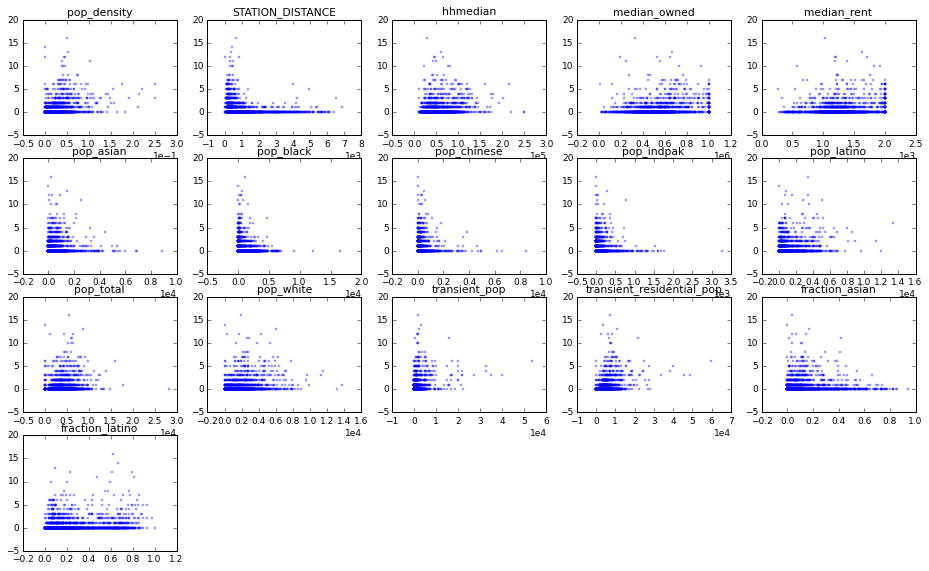

In [117]:
mpl.rcParams["font.size"] = 9
mpl.rcParams["figure.figsize"] = (16,12)
gs = gridspec.GridSpec(5, 5)
cuisine_type = "mexican"
fig = plt.figure()
for i in range(nfeatures):
    ax = fig.add_subplot(gs[i])
    ax.scatter(df[pred_features[i]],df["number_restaurants_"+cuisine_type],s=3,alpha=0.3,color="blue")
    ax.set_title(pred_features[i])
    ax.ticklabel_format(axis="x",style = 'sci', scilimits=(-1,1))

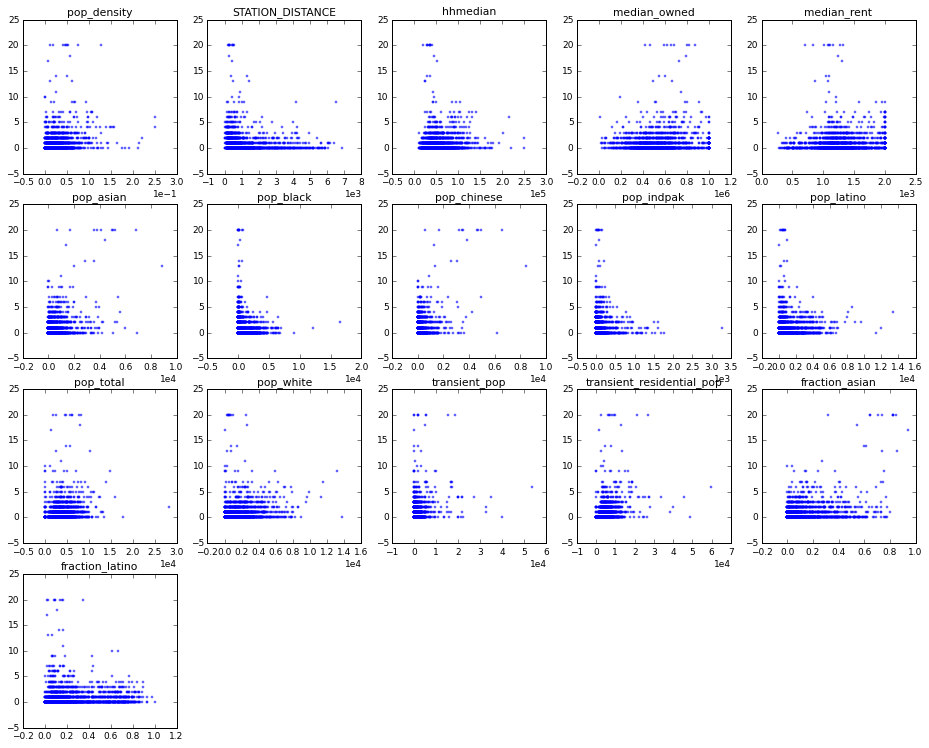

In [120]:
mpl.rcParams["font.size"] = 9
mpl.rcParams["figure.figsize"] = (16,16)
gs = gridspec.GridSpec(5, 5)
cuisine_type = "chinese"
fig = plt.figure()
for i in range(nfeatures):
    ax = fig.add_subplot(gs[i])
    ax.scatter(df[pred_features[i]],df["number_restaurants_"+cuisine_type],s=3,color="blue",alpha=0.5)
    ax.set_title(pred_features[i])
    ax.ticklabel_format(axis="x",style = 'sci', scilimits=(-1,1))

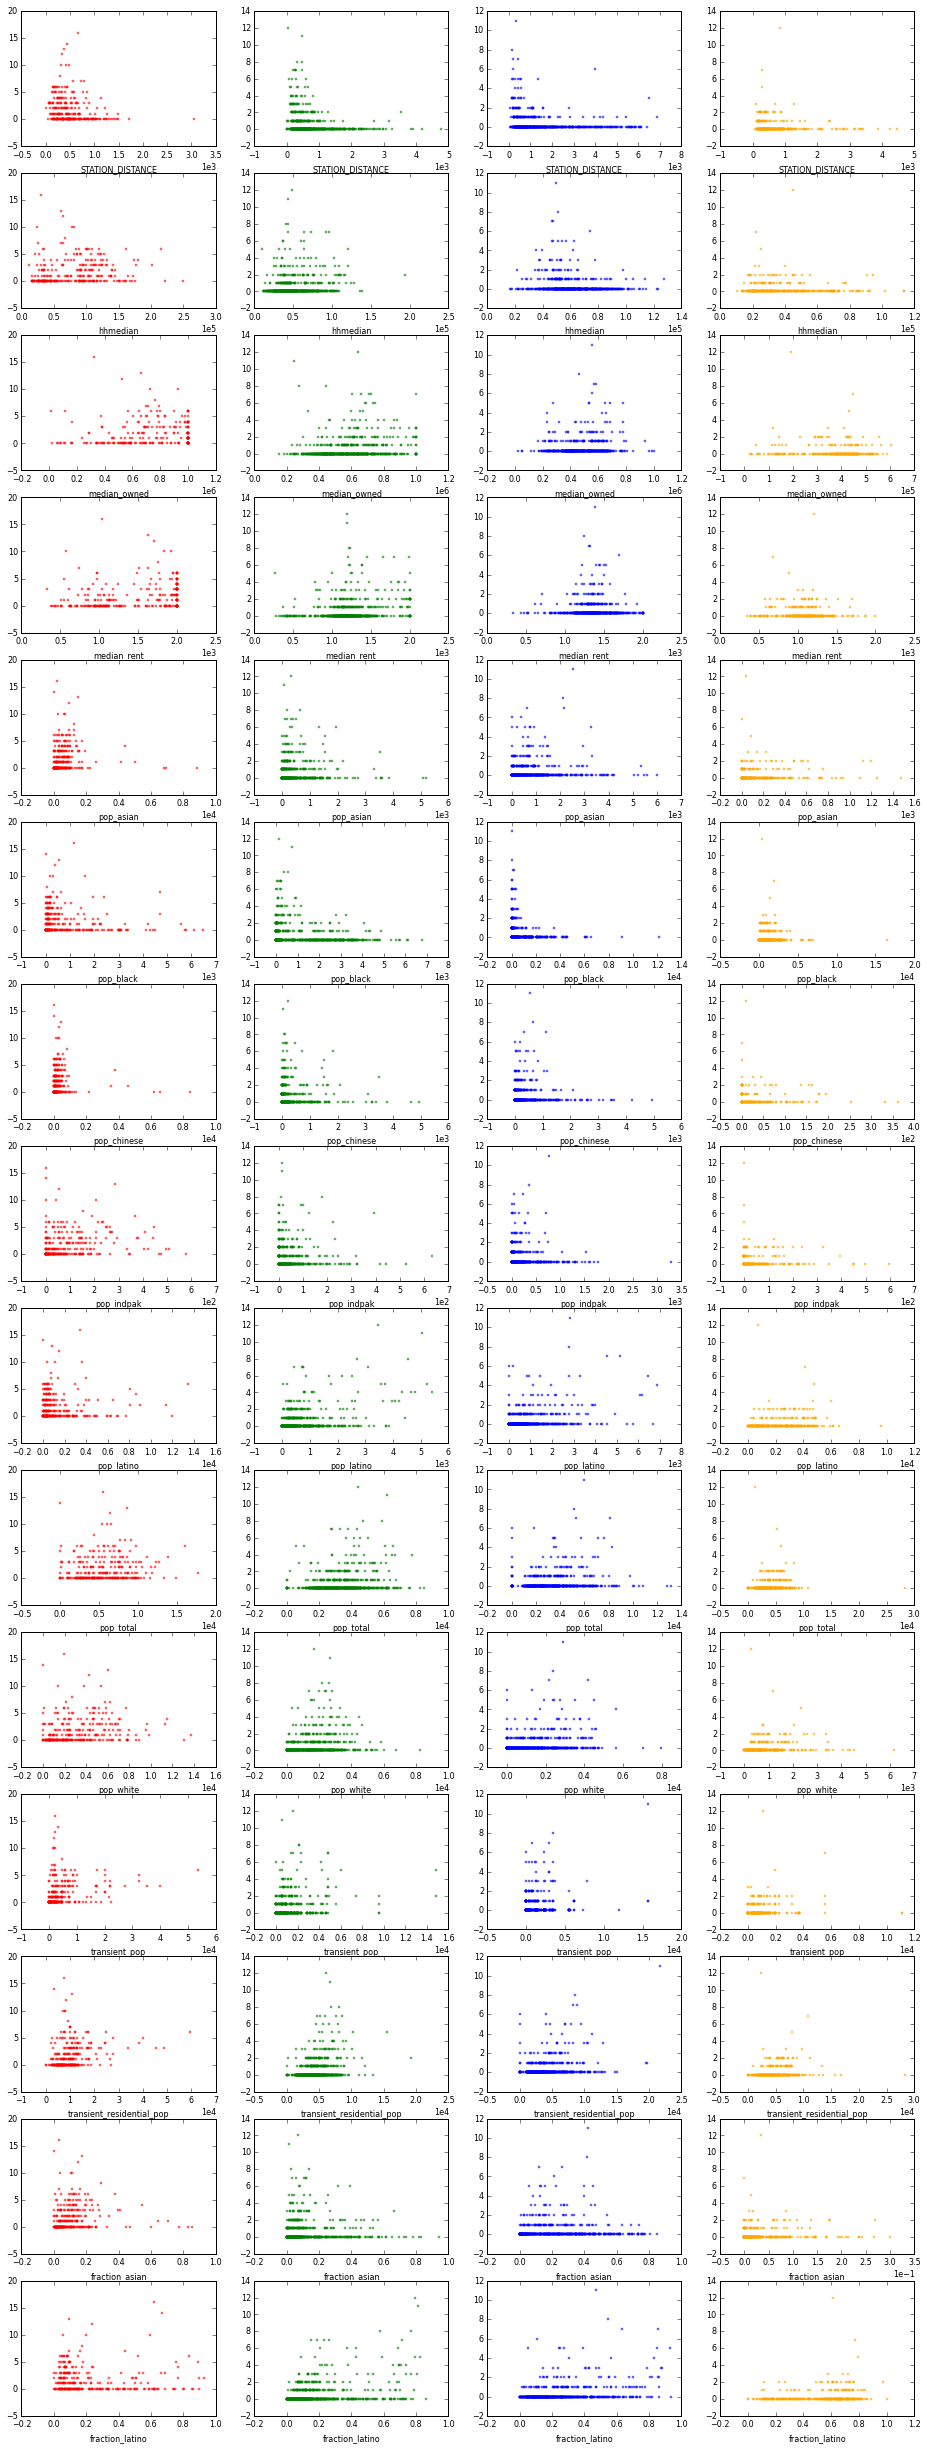

In [105]:
mpl.rcParams["font.size"] = 8
mpl.rcParams["figure.figsize"] = (16,46)
cuisine_type = "mexican"
fig = plt.figure()
df_manhattan = df[df['BOROUGH'] == "Manhattan"]
df_brooklyn = df[df['BOROUGH'] == "Brooklyn"]
df_queens = df[df['BOROUGH'] == "Queens"]
df_bronx = df[df['BOROUGH'] == "Bronx"]
dflist = [df_manhattan,df_brooklyn,df_queens,df_bronx]
gs = gridspec.GridSpec(16, 4)
colors = ["red","green","blue","orange"]
for i in range(nfeatures):
    for j in range(4):
        ax = fig.add_subplot(gs[int(4*i+j)])
        ax.scatter(dflist[j][pred_features[i]],dflist[j]["number_restaurants_"+cuisine_type],s=3,color=colors[j],alpha=0.5)
        ax.set_xlabel(pred_features[i])
        ax.ticklabel_format(axis="x",style = 'sci', scilimits=(-1,1))

In [415]:
def first_element(x):
    return x.iloc[0]
dfzip = df.groupby('ZIPCODE').apply(sum)
dfzip2 = df.groupby('ZIPCODE').apply(np.mean)
dfzip3 = df.groupby('ZIPCODE').apply(first_element)

In [435]:
dfzip['FRAC_LAND'] = dfzip['ALAND'] / (dfzip['ALAND'] + dfzip['AWATER'])
dfzip['INTPTLAT'] = dfzip2['INTPTLAT']
dfzip['INTPTLONG'] = dfzip2['INTPTLONG']
dfzip['fraction_latino'] = dfzip['pop_latino']/dfzip['pop_total']
dfzip['fraction_asian'] = dfzip['pop_asian']/dfzip['pop_total']
dfzip['fraction_white'] = dfzip['pop_white']/dfzip['pop_total']
dfzip['fraction_black'] = dfzip['pop_black']/dfzip['pop_total']
dfzip['pop_density'] = dfzip['transient_residential_pop'] / dfzip['ALAND']
dfzip['hhmean'] = dfzip2['hhmean']
dfzip['hhmedian'] = dfzip2['hhmedian']
dfzip['house_median'] = dfzip2['house_median']
dfzip['house_index'] = dfzip2['house_index']
dfzip['median_owned'] = dfzip2['median_owned']
dfzip['median_rent'] = dfzip2['median_rent']
dfzip['BOROUGH'] = dfzip3['BOROUGH']

In [436]:
dfzip.columns

Index([u'ALAND', u'ALAND_SQMI', u'AWATER', u'AWATER_SQMI', u'BOROUGH', u'FRAC_LAND', u'GEOID', u'INTPTLAT', u'INTPTLONG', u'LATMAX', u'LATMIN', u'LONGMAX', u'LONGMIN', u'STATE', u'STATE_ID', u'STATION', u'STATION_DISTANCE', u'USPS', u'ZIPCODE', u'average_rating_restaurants_chinese', u'average_rating_restaurants_cuban', u'average_rating_restaurants_greek', u'average_rating_restaurants_indpak', u'average_rating_restaurants_italian', u'average_rating_restaurants_japanese', u'average_rating_restaurants_latin', u'average_rating_restaurants_mexican', u'average_rating_restaurants_newamerican', u'average_rating_restaurants_puertorican', u'average_rating_restaurants_tradamerican', u'average_rating_restaurants_vegetarian', u'closed_number_restaurants_chinese', u'closed_number_restaurants_cuban', u'closed_number_restaurants_greek', u'closed_number_restaurants_indpak', u'closed_number_restaurants_italian', u'closed_number_restaurants_japanese', u'closed_number_restaurants_latin', u'closed_number_r

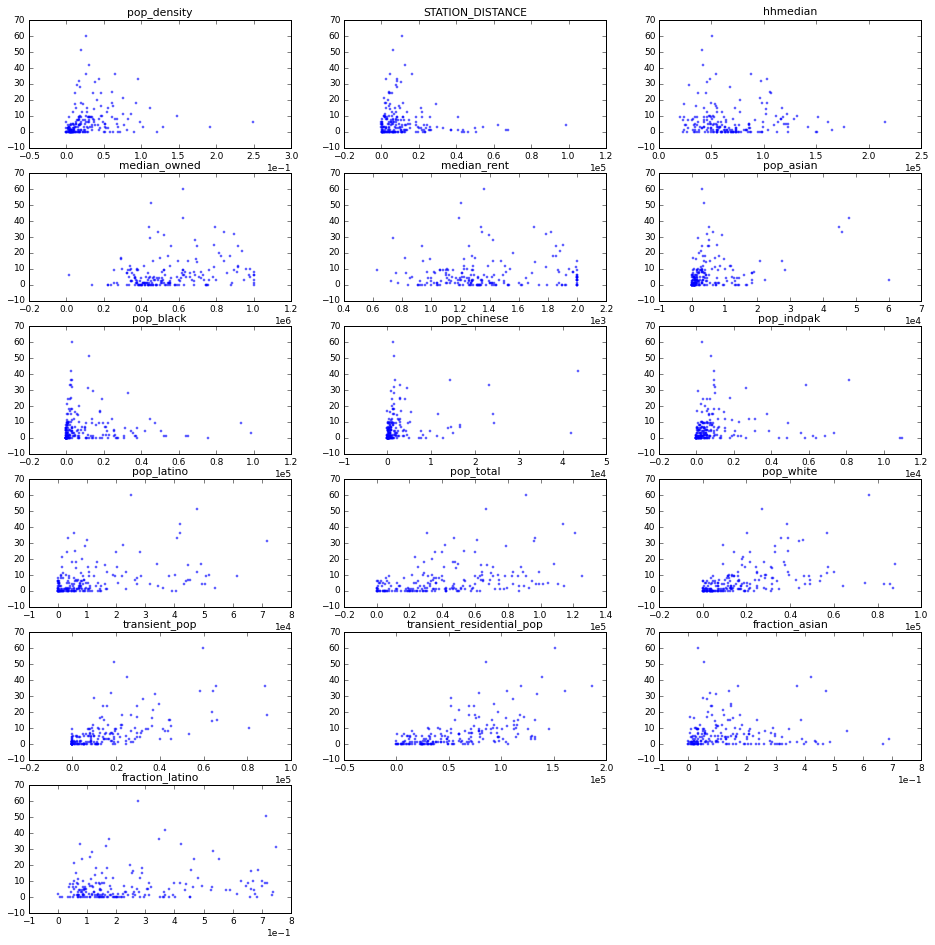

In [492]:
mpl.rcParams["font.size"] = 9
mpl.rcParams["figure.figsize"] = (16,16)
gs = gridspec.GridSpec(6, 3)
cuisine_type = "mexican"
fig = plt.figure()
for i in range(nfeatures):
    ax = fig.add_subplot(gs[i])
    ax.scatter(dfzip[pred_features[i]],dfzip["number_restaurants_"+cuisine_type],s=3,color="blue",alpha=0.5)
    ax.set_title(pred_features[i])
    ax.ticklabel_format(axis="x",style = 'sci', scilimits=(-1,1))

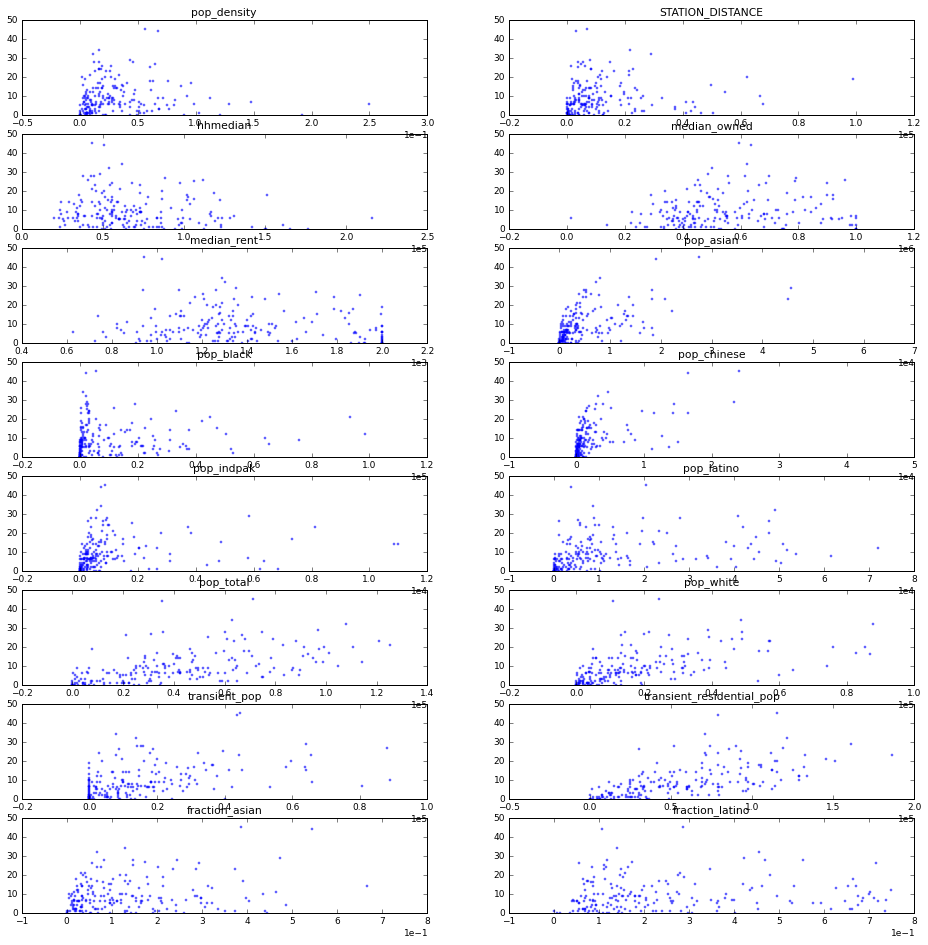

In [484]:
mpl.rcParams["font.size"] = 9
mpl.rcParams["figure.figsize"] = (16,16)
gs = gridspec.GridSpec(8, 2)
cuisine_type = "chinese"
fig = plt.figure()
for i in range(nfeatures):
    ax = fig.add_subplot(gs[i])
    ax.scatter(dfzip[pred_features[i]],dfzip["number_restaurants_"+cuisine_type],s=3,color="blue",alpha=0.5)
    ax.set_title(pred_features[i])
    ax.set_ylim([0,50])
    ax.ticklabel_format(axis="x",style = 'sci', scilimits=(-1,1))

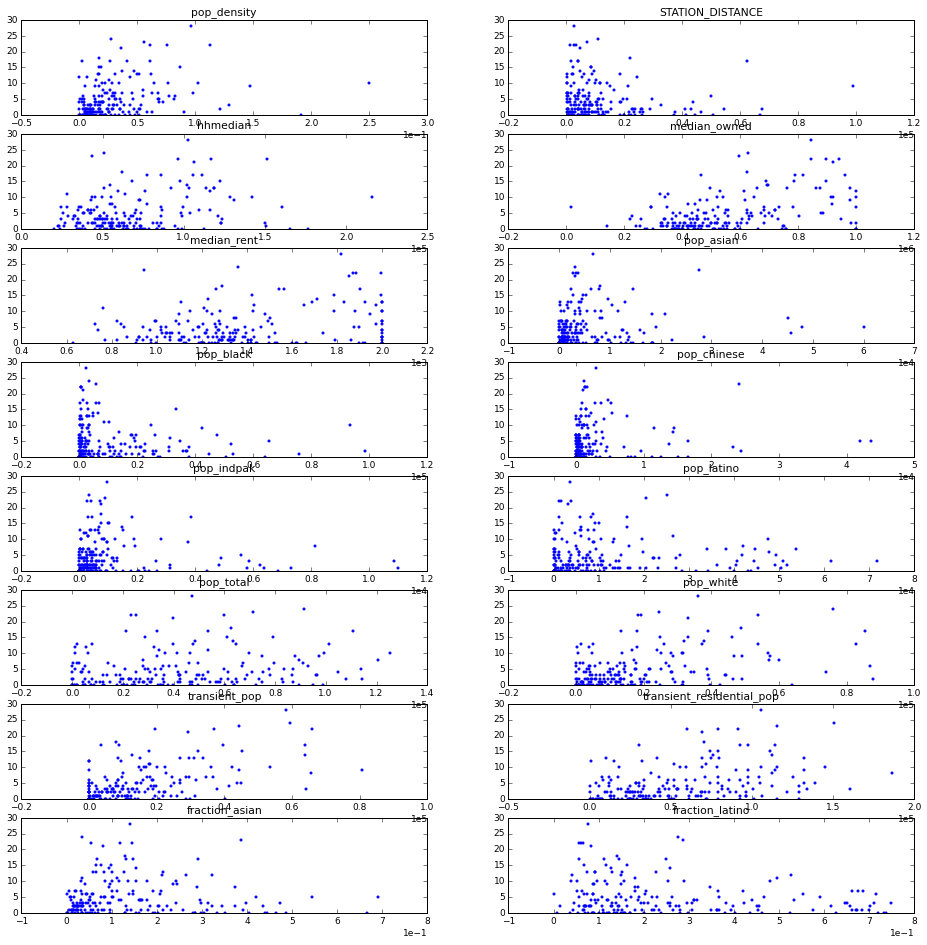

In [491]:
mpl.rcParams["font.size"] = 9
mpl.rcParams["figure.figsize"] = (16,16)
gs = gridspec.GridSpec(8, 2)
cuisine_type = "tradamerican"
fig = plt.figure()
for i in range(nfeatures):
    ax = fig.add_subplot(gs[i])
    ax.scatter(dfzip[pred_features[i]],dfzip["number_restaurants_"+cuisine_type],s=4,color="blue")
    ax.set_title(pred_features[i])
    ax.set_ylim([0,30])
    ax.ticklabel_format(axis="x",style = 'sci', scilimits=(-1,1))

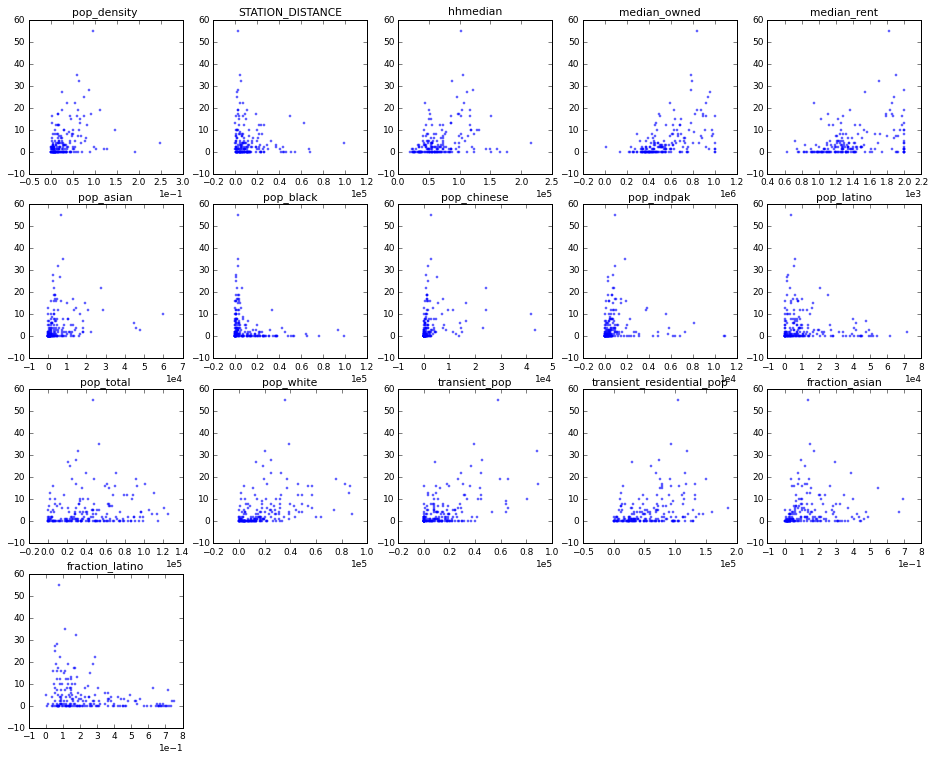

In [440]:
mpl.rcParams["font.size"] = 9
mpl.rcParams["figure.figsize"] = (16,16)
gs = gridspec.GridSpec(5, 5)
cuisine_type = "japanese"
fig = plt.figure()
for i in range(nfeatures):
    ax = fig.add_subplot(gs[i])
    ax.scatter(dfzip[pred_features[i]],dfzip["number_restaurants_"+cuisine_type],s=3,color="blue",alpha=0.5)
    ax.set_title(pred_features[i])
    ax.ticklabel_format(axis="x",style = 'sci', scilimits=(-1,1))

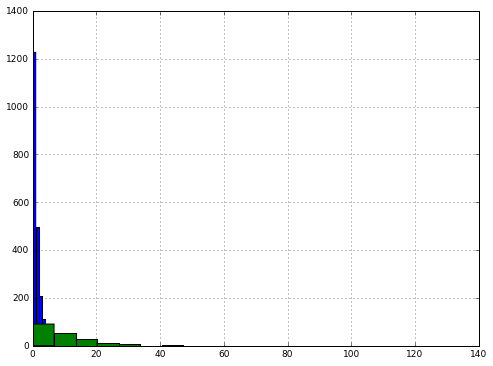

In [441]:
mpl.rcParams["figure.figsize"] = (8,6)
df["number_restaurants_chinese"].hist(bins=20)
dfzip["number_restaurants_chinese"].hist(bins=20)

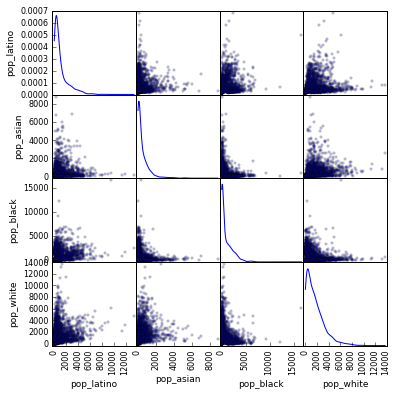

In [442]:
mpl.rcParams["figure.figsize"] = (12,10)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df[['pop_latino','pop_asian','pop_black','pop_white']], alpha=0.2, figsize=(6, 6), diagonal='kde');

#Linear Regression Analysis

In [443]:
dfzip = dfzip[dfzip['ZIPCODE'] != 0]  #drop areas without a zipcode
dfzip.head(3)

,ALAND,ALAND_SQMI,AWATER,AWATER_SQMI,BOROUGH,FRAC_LAND,GEOID,INTPTLAT,INTPTLONG,LATMAX,...,unweighed_average_rating_restaurants_puertorican,unweighed_average_rating_restaurants_tradamerican,unweighed_average_rating_restaurants_vegetarian,zillow_house_index,zillow_house_median,fraction_asian,fraction_latino,pop_density,fraction_white,fraction_black
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
10001,346238,0.133,0,0.000,Manhattan,1.000000,72122017100,40.747402,-73.990328,81.498550,...,NaN,6.671429,8.250000,0,0,0.265458,0.042111,0.043566,0.660092,0.032161
10002,2063151,0.797,1249217,0.482,Manhattan,0.622863,468793019212,40.715444,-73.984217,529.328659,...,NaN,22.375000,8.000000,0,0,0.387337,0.287305,0.056028,0.345783,0.080577
10003,1097625,0.424,0,0.000,Manhattan,1.000000,288488038102,40.730343,-73.989634,325.855934,...,NaN,28.351190,26.233333,0,0,0.139669,0.076578,0.096014,0.760993,0.048017


In [444]:
df.head(3)

ALAND  ALAND_SQMI   AWATER  AWATER_SQMI BOROUGH  \
COUNTY_ID TRACT_ID                                                      
5         100       1672467       0.646  1032658        0.399   Bronx   
          200        455322       0.176   926899        0.358   Bronx   
          2702       157365       0.061        0        0.000   Bronx   

                    FRAC_LAND        GEOID   INTPTLAT  INTPTLONG     LATMAX  \
COUNTY_ID TRACT_ID                                                            
5         100        0.618259  36005000100  40.793492 -73.883532  40.800898   
          200        0.329413  36005000200  40.803486 -73.860438  40.808779   
          2702       1.000000  36005002702  40.806437 -73.913737  40.808224   

                         ...        \
COUNTY_ID TRACT_ID       ...         
5         100            ...         
          200            ...         
          2702           ...         

                    unweighed_average_rating_restaurants_puertorican  \
COUNTY_ID TRACT_ID                                                     
5         100                                                    NaN   
          200                                                    NaN   
          2702                                                   NaN   

                    unweighed_average_rating_restaurants_tradamerican  \
COUNTY_ID TRACT_ID                                                      
5         100                                                     NaN   
          200                                                     NaN   
          2702                                                    NaN   

                    unweighed_average_rating_restaurants_vegetarian  \
COUNTY_ID TRACT_ID                                                    
5         100                                                   NaN   
          200                                                   NaN   
          2702                                                  NaN   

                   zillow_house_index  zillow_house_median fraction_asian  \
COUNTY_ID TRACT_ID                                                          
5         100                       0                    0       0.021978   
          200                       0                    0       0.053314   
          2702                      0                    0       0.000000   

                    fraction_latino pop_density  fraction_white  \
COUNTY_ID TRACT_ID                                                
5         100              0.343706    0.005495        0.148080   
          200              0.666118    0.010669        0.278304   
          2702             0.660385    0.035687        0.270591   

                    fraction_black  
COUNTY_ID TRACT_ID                  
5         100             0.586226  
          200             0.309592  
          2702            0.376244  

[3 rows x 128 columns]

In [454]:
def create_feature_matrix(dataframe,feature_list,cuisine_type,single_feature=False):

    np.set_printoptions(precision=8)
    
    #get size of matrix
    ncols = len(feature_list)
    nrows = len(dataframe)
        
    if single_feature == True:
        X_ = np.array(dataframe[feature_list].astype('float'))
        X_ = X_[:,np.newaxis]
    else:
        X = []
        for feature in feature_list:
            A = np.array(dataframe[feature].astype('float'))
            X.append(A)    
        X_ = np.vstack(X).T
    
    Y = np.array(dataframe["number_restaurants_"+cuisine_type].astype('float'))
    Y = Y[:,np.newaxis]
    X_ = np.nan_to_num(X_)
    
    return np.matrix(X_), np.matrix(Y)

def linear_model(dataframe,features,cuisines_list,single_feature=False):
    
    from sklearn.preprocessing import Imputer
    from sklearn import linear_model
    from sklearn.metrics import explained_variance_score
    
    output = {}
    
    for cuisine_type in cuisines_list:
        
        X, Y = create_feature_matrix(dataframe,features,cuisine_type,single_feature)
        clf = linear_model.LinearRegression()
        clf.fit(X,Y)
        EVS = explained_variance_score(Y, clf.predict(X))
        output[cuisine_type] = EVS
        
    return output

In [463]:
len(dfzip_bronx)

25

In [456]:
#Linear Regression with All Features
dfzip_manhattan = dfzip[dfzip['BOROUGH'] == "Manhattan"]
dfzip_queens = dfzip[dfzip['BOROUGH'] == "Queens"]
dfzip_brooklyn = dfzip[dfzip['BOROUGH'] == "Brooklyn"]
dfzip_bronx = dfzip[dfzip['BOROUGH'] == "Bronx"]

pred_features = ['pop_density','STATION_DISTANCE','hhmedian',
                 'median_owned','median_rent','pop_asian','pop_black',
                 'pop_chinese','pop_indpak','pop_latino','pop_total',
                 'pop_white','transient_pop','transient_residential_pop',
                 'fraction_asian','fraction_latino', 'fraction_black','fraction_white']
linear_model(dfzip,pred_features,cuisine_types)

{'chinese': 0.74850504547962138,
 'cuban': 0.32797173419038728,
 'greek': 0.18266543136752889,
 'indpak': 0.43380964999412019,
 'italian': 0.56717931694371015,
 'japanese': 0.52366757370086914,
 'latin': 0.67270227160302676,
 'mexican': 0.55128243435763291,
 'newamerican': 0.56429151510242548,
 'puertorican': 0.063255718948168504,
 'tradamerican': 0.55062121067385505,
 'vegetarian': 0.37837147307899466}

In [457]:
linear_model(dfzip_manhattan,pred_features,cuisine_types)

{'chinese': 0.74335657647495423,
 'cuban': 0.38752984331124107,
 'greek': 0.55809858462111928,
 'indpak': 0.51640288970097048,
 'italian': 0.6892458565263555,
 'japanese': 0.66777379936894121,
 'latin': 0.77512597482570644,
 'mexican': 0.6372788274464265,
 'newamerican': 0.67083571444975698,
 'puertorican': 0.50252480761860063,
 'tradamerican': 0.69109157887632489,
 'vegetarian': 0.49056438364444621}

In [458]:
linear_model(dfzip_queens,pred_features,cuisine_types)

{'chinese': 0.81868314707930512,
 'cuban': 0.41822798623892865,
 'greek': 0.41489337563106565,
 'indpak': 0.6376569129748596,
 'italian': 0.77533926158814548,
 'japanese': 0.68311077324374403,
 'latin': 0.91240387164766656,
 'mexican': 0.86159076992836492,
 'newamerican': 0.53632083562538679,
 'puertorican': 1.0,
 'tradamerican': 0.48721543737042317,
 'vegetarian': 0.43783702265596502}

In [459]:
linear_model(dfzip_brooklyn,pred_features,cuisine_types)

{'chinese': 0.89525483906482517,
 'cuban': 0.66710686203390712,
 'greek': 0.53672458638329457,
 'indpak': 0.68472244521834802,
 'italian': 0.71765273102477611,
 'japanese': 0.67580807969246726,
 'latin': 0.8450146669643358,
 'mexican': 0.72460569118236151,
 'newamerican': 0.73880375498683637,
 'puertorican': 0.52023260920991277,
 'tradamerican': 0.70733763749962764,
 'vegetarian': 0.55966224919805896}

In [460]:
linear_model(dfzip_bronx,pred_features,cuisine_types)

{'chinese': 0.79624437660108982,
 'cuban': 0.77786912683667375,
 'greek': 0.95354336657007743,
 'indpak': 0.82042890272385138,
 'italian': 0.65947586161072125,
 'japanese': 0.86528705235678838,
 'latin': 0.70172033686560598,
 'mexican': 0.63619993026424548,
 'newamerican': 0.73945920867300807,
 'puertorican': 0.90481697231191105,
 'tradamerican': 0.74672169454483273,
 'vegetarian': 0.67200399558911206}

In [474]:
#Linear Regression for Single Feature
feature_evs = {}
for ii in range(len(pred_features)):
    x = linear_model(dfzip,pred_features[ii],cuisine_types,single_feature=True)
    feature_evs[pred_features[ii]] = [np.mean(x.values()),np.std(x.values()),np.mean(x.values())/np.std(x.values())]

{'STATION_DISTANCE': [0.012728593944623473,
  0.0069087863026134743,
  1.8423777183278149],
 'fraction_asian': [0.017357658670231424,
  0.039512277716647073,
  0.43929785052402587],
 'fraction_black': [0.041531933864090105,
  0.034518297802034734,
  1.203186034904709],
 'fraction_latino': [0.042790716092302526,
  0.054533788593940369,
  0.78466428237588659],
 'fraction_white': [0.065635948812301836,
  0.06581427115339071,
  0.99729052167616861],
 'hhmedian': [0.047300501943489261, 0.038150485067287666, 1.2398401189411699],
 'median_owned': [0.10604603610318653,
  0.078961969146445737,
  1.3430014125725473],
 'median_rent': [0.054702925894846453,
  0.044340996767343509,
  1.2336873296257145],
 'pop_asian': [0.07235671956929314, 0.14578044933301301, 0.49634035222381118],
 'pop_black': [0.016657346181353921,
  0.020535788166063045,
  0.81113741759770663],
 'pop_chinese': [0.072862892955611921,
  0.18146510779380282,
  0.40152563675439673],
 'pop_density': [0.055892703840580753,
  0.040173

In [475]:
#Linear Regression for Single Feature
feature_evs_manhattan = {}
for ii in range(len(pred_features)):
    x = linear_model(dfzip_manhattan,pred_features[ii],cuisine_types,single_feature=True)
    feature_evs_manhattan[pred_features[ii]] = [np.mean(x.values()),np.std(x.values()),np.mean(x.values())/np.std(x.values())]

In [477]:
#Linear Regression for Single Feature
feature_evs_queens = {}
for ii in range(len(pred_features)):
    x = linear_model(dfzip_queens,pred_features[ii],cuisine_types,single_feature=True)
    feature_evs_queens[pred_features[ii]] = [np.mean(x.values()),np.std(x.values()),np.mean(x.values())/np.std(x.values())]

In [478]:
#Linear Regression for Single Feature
feature_evs_brooklyn = {}
for ii in range(len(pred_features)):
    x = linear_model(dfzip_brooklyn,pred_features[ii],cuisine_types,single_feature=True)
    feature_evs_brooklyn[pred_features[ii]] = [np.mean(x.values()),np.std(x.values()),np.mean(x.values())/np.std(x.values())]

In [479]:
#Linear Regression for Single Feature
feature_evs_bronx = {}
for ii in range(len(pred_features)):
    x = linear_model(dfzip_bronx,pred_features[ii],cuisine_types,single_feature=True)
    feature_evs_bronx[pred_features[ii]] = [np.mean(x.values()),np.std(x.values()),np.mean(x.values())/np.std(x.values())]

## move to lasson regression.

In [452]:
#Linear Regression with All Features
#pred_features_light = ['pop_density','STATION_DISTANCE','hhmedian',
#                 'median_owned','median_rent','pop_asian','pop_black',
#                 'pop_chinese','pop_indpak','pop_latino','pop_total',
#                 'pop_white','transient_pop','transient_residential_pop',
#                 'fraction_asian','fraction_latino', 'fraction_black','fraction_white']
linear_model(dfzip,pred_features,cuisine_types)

{'chinese': 0.74850504547962138,
 'cuban': 0.32797173419038728,
 'greek': 0.18266543136752889,
 'indpak': 0.43380964999412019,
 'italian': 0.56717931694371015,
 'japanese': 0.52366757370086914,
 'latin': 0.67270227160302676,
 'mexican': 0.55128243435763291,
 'newamerican': 0.56429151510242548,
 'puertorican': 0.063255718948168504,
 'tradamerican': 0.55062121067385505,
 'vegetarian': 0.37837147307899466}

In [432]:
EVS = explained_variance_score(Y, clf.predict(X))
print "{0:s} : {1:<6.4f}".format("Mexican",EVS)

Mexican : 0.5513


In [ ]:
clf = linear_model.Lasso(alpha = 0.1)
>>> clf.fit([[0, 0], [1, 1]], [0, 1])
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
>>> clf.predict([[1, 1]])
array([ 0.8])